In [1]:
#mnist load parameter and predict

In [2]:
import pandas as pd
import numpy as np

from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, model_zoo, nn
import mxnet as mx
import datetime

In [3]:
test_data = pd.read_csv("../../mnist_data/test.csv")

In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
transform_test = gdata.vision.transforms.Compose([
    gdata.vision.transforms.ToTensor(),
    gdata.vision.transforms.Normalize([0.4914],
                                      [0.2023])
])

In [13]:
test_dataset = gdata.dataset.ArrayDataset(nd.array(test_data.values.reshape(-1,28,28,1)))
test_iter = gdata.DataLoader(test_dataset.transform_first(transform_test), batch_size=100, shuffle=False, last_batch='keep')

In [14]:
def get_net(ctx):
    net= model_zoo.vision.resnet18_v2()
    net.output = nn.Dense(10)
    return net

In [15]:
net = get_net(mx.gpu(0))

In [58]:
net.load_parameters('resnet18_predict')

In [59]:
predict = []
for i in test_iter:
    y_hat = net(i)
    predict.extend(y_hat.asnumpy().argmax(axis=1).astype(int))

In [43]:
print(type(predict))

<class 'list'>


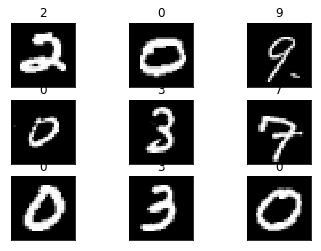

In [44]:
import matplotlib.pyplot as plt

for f in range(0,9):
    plt.subplot(331+f)
    a = test_data.iloc[f,:].values.reshape(28,28)
    plt.imshow(a,cmap=plt.get_cmap('gray'))
    plt.title(predict[f])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [60]:
result = pd.DataFrame({'ImageId':test_data.index+1, 'Label':predict})

In [61]:
result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [62]:
result.to_csv("resnet18_result_more_train.csv", index=False)